<h1>Auto Insurance Fraud Identification by Combining Unsupervised, Supervised, and Deep Learning<h1>

## 1. Introduction

Insurance fraud has become a massive problem in almost all industries, including auto insurance. Fraudulent claims account for a significant portion of all claims received by auto insurance companies and cost billions of dollars annually. However, it's challenging to identify fraudulent claims. This project aims to deliver a product using prediction models for detecting auto insurance fraud with machine learning approaches. By using the product, based on the features of the claims including the information related to the policy, policyholder, incident, claim, vehicle and etc., auto insurance companies can identify the fraudulent claims and prevent the loss.

In this study, I use the real auto insurance data from kaggle https://www.kaggle.com/code/buntyshah/insurance-fraud-claims-detection/data. It contains 1000 observations with 18 numeric variables and 21 categorical variables related to the properties of insurance policy, policyholder, incident, claim, and vehicle. There are no missing values. 

* months_as_customer: It denotes the number of months for which the customer is associated with the insurance company.
* age: continuous. It denotes the age of the person.
* policy_number: The policy number.
* policy_bind_date: Start date of the policy.
* policy_state: The state where the policy is registered.
* policy_csl: combined single limits. How much of the bodily injury will be covered from the total damage.
https://www.berkshireinsuranceservices.com/arecombinedsinglelimitsbetter
* policy_deductable: The amount paid out of pocket by the policy-holder before an insurance provider will pay any expenses.
* policy_annual_premium: The yearly premium for the policy.
* umbrella_limit: An umbrella insurance policy is extra liability insurance coverage that goes beyond the limits of the insured's homeowners, auto, or watercraft insurance. It provides an additional layer of security to those who are at risk of being sued for damages to other people's property or injuries caused to others in an accident.
* insured_zip: The zip code where the policy is registered.
* insured_sex: It denotes the person's gender.
* insured_education_level: The highest educational qualification of the policy-holder.
* insured_occupation: The occupation of the policy-holder.
* insured_hobbies: The hobbies of the policy-holder.
* insured_relationship: Dependents on the policy-holder.
* capital-gain: It denotes the monitory gains by the person.
* capital-loss: It denotes the monitory loss by the person.
* incident_date: The date when the incident happened.
* incident_type: The type of the incident.
* collision_type: The type of collision that took place.
* incident_severity: The severity of the incident.
* authorities_contacted: Which authority was contacted.
* incident_state: The state in which the incident took place.
* incident_city: The city in which the incident took place.
* incident_location: The street in which the incident took place.
* incident_hour_of_the_day: The time of the day when the incident took place.
* number_of_vehicles_involved: Number of cars involved in the incident.
* property_damage: If any property damage was done.
* bodily_injuries: Number of bodily injuries.
* Witnesses: Number of witnesses present.
* police_report_available: Is the police report available.
* total_claim_amount: Total amount claimed by the customer.
* injury_claim: Amount claimed for injury
* property_claim: Amount claimed for property damage.
* vehicle_claim: Amount claimed for vehicle damage.
* auto_make: The manufacturer of the vehicle
* auto_model: The model of the vehicle.
* auto_year: The year of manufacture of the vehicle.
* fraud_reported: Y or N (Target Label):Whether the claim is fraudulent or not.
 
The **challenge** of this project is the behaviors of the fraudulent claims could be deceptive and similar to the regular claims. With 39 features in the dataset, feature engineering is very crucial to the model performance. In this product, I implement unsupervised learning algorithms such as K-means, Agglomerative, and Gaussian mixture to cluster auto claims into two groups. For each cluster, supervised learning algorithms such as logistic regression, random forest, KNN, and gradient boosting, as well as deep learning algorithsm, ANN, are used to identify fraudulent claims.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder 

#For unsupervised learning
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import datasets, metrics


#For supervised learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import normalize, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix


#Deep learning tools
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import classification_report, confusion_matrix

## 2. Data wrangling 

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('insurance_claims.csv')
#URL_data = 'https://drive.google.com/file/d/1iU5PZyoQ3yy7u8VsSl5_1OWd4DxhCBLr/view?usp=sharing'
#path_data = 'https://drive.google.com/uc?export=download&id='+URL_data.split('/')[-2]
#df = pd.read_csv(path_data)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [6]:
#create a column for the days between policy start and the incident
#https://sparkbyexamples.com/pandas/pandas-change-string-object-to-date-in-dataframe/
#https://stackoverflow.com/questions/37840812/pandas-subtracting-two-date-columns-and-the-result-being-an-integer
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date']) 
df['days_incident_policy'] = (df['incident_date'] - df['policy_bind_date']).dt.days

In [7]:
# change fraud_reported to int
df.fraud_reported = df.fraud_reported.map({'Y':1, 'N':0})

In [8]:
sum(df.fraud_reported)

247

In [9]:
#remove categorical variables with 1000 unique values
#total_claim_amount = injury_claim + property_claim + vehicle_claim  
drop_col = ['policy_number','incident_location','insured_zip','policy_bind_date','incident_date','total_claim_amount','_c39']

In [10]:
#drop first batch of useless features
df_1 = df.drop(drop_col,axis=1)

## 3. Data exploration

Heatmap of numeric variables

In [11]:
#list all the numeric variables
num_columns_list = list(df_1.select_dtypes(include=['int','float']))
num_columns_list

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 'fraud_reported',
 'days_incident_policy']

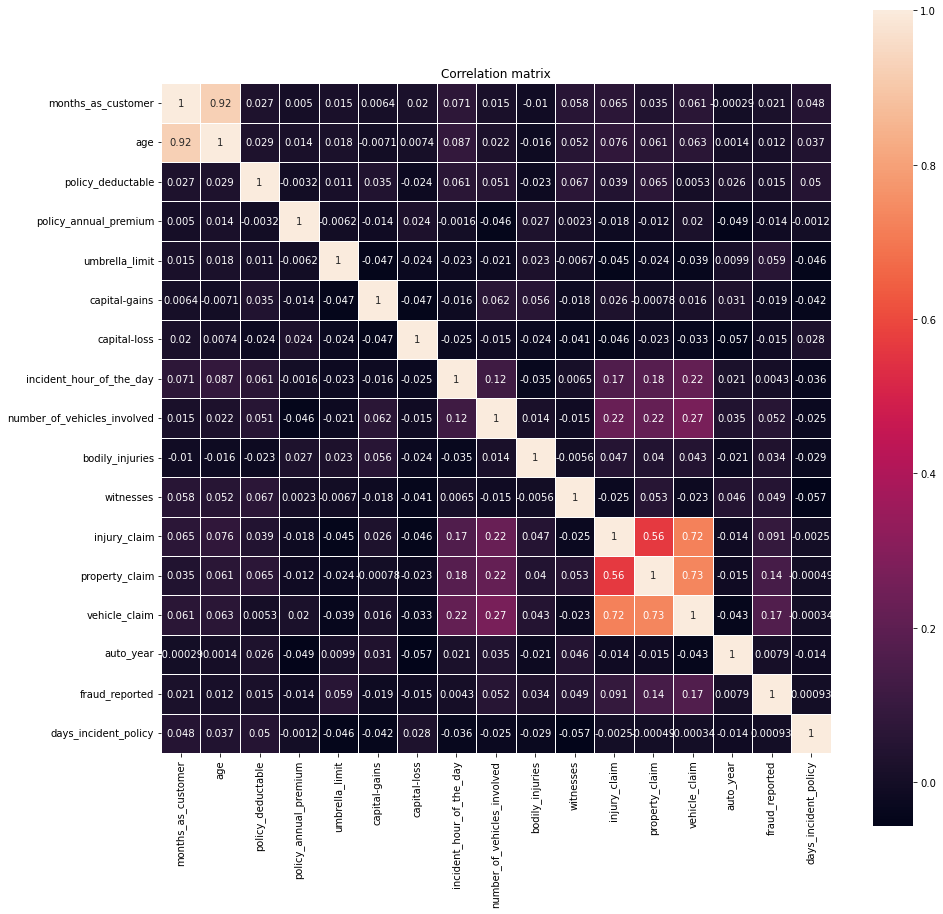

In [12]:
#plot the heatmap of correlation between numeric variables
corrmat_df_1 = df_1[num_columns_list].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corrmat_df_1,square=True,annot=True,linewidths=0.5)
plt.title("Correlation matrix")
plt.show()

In [13]:
#list all the categorical variables
cat_columns_list = list(df_1.select_dtypes(include=['object']))
cat_columns_list

['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model']

Bar chart of target variable vs. categorical variables

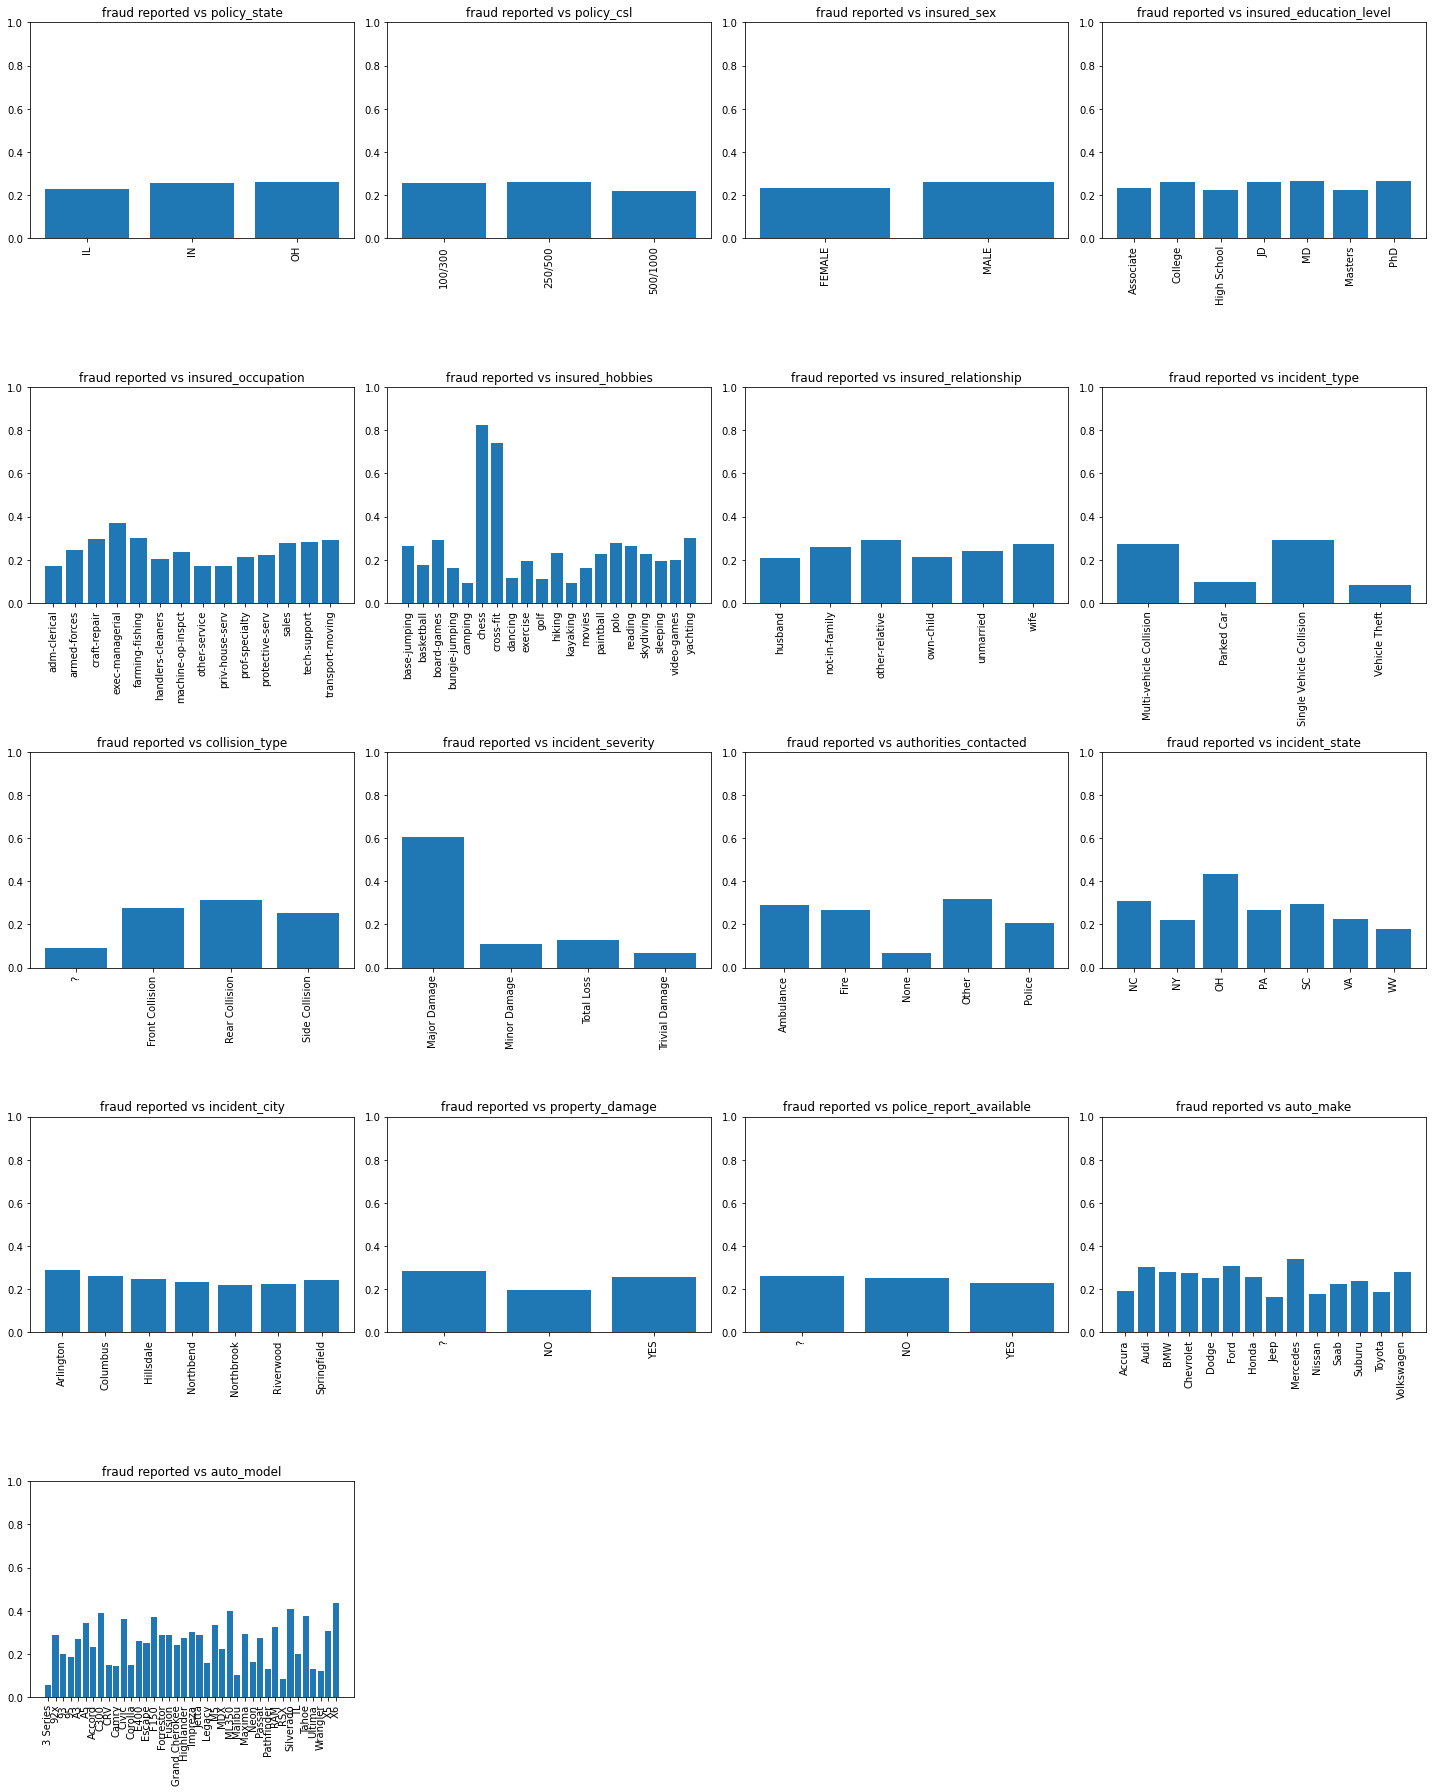

In [14]:
plt.figure(figsize=(20,25))
for i, column in enumerate(cat_columns_list):
    plt.subplot(5,4,i+1)
    plt.bar(df_1.groupby(column)['fraud_reported'].mean().index,df_1.groupby(column)['fraud_reported'].mean())
    plt.title('fraud reported vs {}'.format(column))
    plt.ylim([0,1])
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
#categorical features with minor effect on target varible
drop_col_1 = ['policy_state','policy_csl','insured_sex','insured_education_level',
              'insured_relationship', 'incident_city', 'property_damage',
              'police_report_available']

In [16]:
# drop 2nd batch of categorical features 
df_2 = df_1.drop(drop_col_1,axis=1)

In [17]:
#list so far categorical variables
cat_columns_list_1 = list(df_2.select_dtypes(include=['object']))
cat_columns_list_1

['insured_occupation',
 'insured_hobbies',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'auto_make',
 'auto_model']

In [18]:
#https://www.codegrepper.com/code-examples/python/one+hot+encoder+python
#https://www.programcreek.com/python/example/93358/sklearn.preprocessing.OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

for column in cat_columns_list_1:
    encoder = OneHotEncoder()
    cat_hot=encoder.fit_transform(df_2[column].values.reshape(-1,1))
    cat_hot_df=pd.DataFrame(cat_hot.toarray())
    df_2 = pd.concat([df_2.drop(column, axis=1), cat_hot_df], axis=1)

#cat_hot = encoder.fit_transform(df_temp[cat_columns_list_1].values.reshape(-1,1))
#cat_hot_df = pd.DataFrame(cat_hot.toarray())
#df_2 = pd.concat([df_temp.drop(cat_columns_list_1, axis=1), cat_hot_df], axis=1)

In [19]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 128 entries, months_as_customer to 38
dtypes: float64(112), int64(16)
memory usage: 1000.1 KB


In [20]:
np.shape(df_2)

(1000, 128)

Pair plot

In [21]:
#plt.figure(figsize=(25,20))
#sns.pairplot(df_2, hue='fraud_reported')
#plt.show()

In [22]:
#seperate features and target variable into 2 dataframes
X = df_2.drop('fraud_reported',axis=1)
y = df_2['fraud_reported']

In [23]:
# Standardize the data.
#X_std is an array
scaler = StandardScaler()
X_sc= scaler.fit_transform(X)

**Observation:** 
1. After data wrangling, there are 25 features in the dataset.
2. Most of the features show similar distribution for regular and fraudulent claims.
3. 'collision_type', 'incident_severity', 'injury_claim'shows different distribution in fraudulent and regular claims, having more frauds in certain range of values.

## 4. Modeling pipeline

## 4.1 Unsupervised Learning Clustering

In [24]:
pca = PCA(n_components=10)
pca_components = pca.fit_transform(X_sc)
pca.explained_variance_ratio_

array([0.04744875, 0.02230904, 0.01944748, 0.01856362, 0.01820229,
       0.01788201, 0.0177491 , 0.01757721, 0.01754431, 0.01740008])

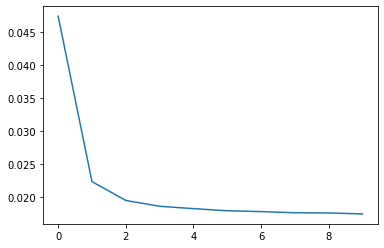

In [25]:
plt.plot(pca.explained_variance_ratio_)

### 4.1.1 Unsupervised algorithms evaluation

In [26]:
#Dimension reductin for unsupervised learning
pca = PCA(n_components=3)
pca_components_3 = pca.fit_transform(X_sc)

#### 4.1.1.1 K-means

In [27]:
silh_score=[]

for cluster in range(2,10):
    km_screen = KMeans(n_clusters=cluster, random_state=123).fit_predict(pca_components_3)
    print('Cluster = {}, silhouette score is {}'.format(cluster,metrics.silhouette_score(pca_components_3, km_screen, metric='euclidean')))

Cluster = 2, silhouette score is 0.5487238327533943
Cluster = 3, silhouette score is 0.4601614904410288
Cluster = 4, silhouette score is 0.4352081297731513
Cluster = 5, silhouette score is 0.4271670675123463
Cluster = 6, silhouette score is 0.3895577469520586
Cluster = 7, silhouette score is 0.3641105861706869
Cluster = 8, silhouette score is 0.324098922355013
Cluster = 9, silhouette score is 0.3153017954698042


In [28]:
#best km model based on silhouette score
km = KMeans(n_clusters=2, random_state=123).fit_predict(pca_components_3)
print('Cluster = 2, silhouette score is {}'.format(metrics.silhouette_score(pca_components_3, km, metric='euclidean')))

Cluster = 2, silhouette score is 0.5487238327533943


In [29]:
print('Comparing K-Means clusters against the data:')
print(pd.crosstab(km, y))

Comparing K-Means clusters against the data:
fraud_reported    0    1
row_0                   
0               591  231
1               162   16


#### 4.1.1.2 Agglomerative Clustering

In [30]:
print("silhouette score for linkeage='average', affinity='cosine':\n")
for i in range(2,10):
    agg_cluster = AgglomerativeClustering(linkage='average', 
                                      affinity='cosine',
                                      n_clusters=i)
    # Fit model
    agg_screen = agg_cluster.fit_predict(pca_components_3)
    print('n_cluster = {}, silhouette score is {}'.format(i,metrics.silhouette_score(pca_components_3, agg_screen, metric='euclidean')))

silhouette score for linkeage='average', affinity='cosine':

n_cluster = 2, silhouette score is 0.5487238327533943
n_cluster = 3, silhouette score is 0.45701311588518617
n_cluster = 4, silhouette score is 0.4176874519425638
n_cluster = 5, silhouette score is 0.4176693180724656
n_cluster = 6, silhouette score is 0.35777448033375997
n_cluster = 7, silhouette score is 0.3162937585349719
n_cluster = 8, silhouette score is 0.2808680177328678
n_cluster = 9, silhouette score is 0.23658201084826105


In [31]:
print("silhouette score for linkeage='ward', affinity='euclidean':\n")
for i in range(2,10):
    agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=i)
    # Fit model
    agg_screen = agg_cluster.fit_predict(pca_components_3)
    print('n_cluster = {}, silhouette score is {}'.format(i,metrics.silhouette_score(pca_components_3, agg_screen, metric='euclidean')))

silhouette score for linkeage='ward', affinity='euclidean':

n_cluster = 2, silhouette score is 0.5487238327533943
n_cluster = 3, silhouette score is 0.45729048517236504
n_cluster = 4, silhouette score is 0.42346927135973744
n_cluster = 5, silhouette score is 0.3951962860156516
n_cluster = 6, silhouette score is 0.356128807583082
n_cluster = 7, silhouette score is 0.3327947563256436
n_cluster = 8, silhouette score is 0.28207578330974864
n_cluster = 9, silhouette score is 0.2696506831577094


In [32]:
#best agglomerative
agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=2)
# Fit model
agg = agg_cluster.fit_predict(pca_components_3)
print('n_cluster = 2, Cluster is {}, silhouette score is {}'.format(len(np.unique(agg)), metrics.silhouette_score(pca_components_3, agg, metric='euclidean')))

n_cluster = 2, Cluster is 2, silhouette score is 0.5487238327533943


In [33]:
print('Comparing Agglomerative clusters against the data:')
#agg = np.array([1 if x == 0 else 0 if x==1 else 2 for x in agg])
print(pd.crosstab(agg, y))

Comparing Agglomerative clusters against the data:
fraud_reported    0    1
row_0                   
0               591  231
1               162   16


#### 4.1.1.3 Gaussian Mixture

In [34]:
# Defining the agglomerative clustering
cov_list=['full','tied','diag','spherical']
for i in cov_list:
    gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type=i)
    # Fit model
    gmm_screen = gmm_cluster.fit_predict(pca_components_3)
    print('For covariance_type = {}, silhouette score is {}'.format(i,metrics.silhouette_score(pca_components_3, gmm_screen, metric='euclidean')))

For covariance_type = full, silhouette score is 0.5487238327533943
For covariance_type = tied, silhouette score is 0.5487238327533943
For covariance_type = diag, silhouette score is 0.5487238327533943
For covariance_type = spherical, silhouette score is 0.5487238327533943


In [35]:
n_list=[2,3,4,5,6,10]
for i in n_list:
    gmm_cluster = GaussianMixture(n_components=i, random_state=123, covariance_type='spherical')
    # Fit model
    gmm_screen = gmm_cluster.fit_predict(pca_components_3)
    print('For n_components = {}, silhouette score is {}'.format(i,metrics.silhouette_score(pca_components_3, gmm_screen, metric='euclidean')))

For n_components = 2, silhouette score is 0.5487238327533943
For n_components = 3, silhouette score is 0.4601614904410288
For n_components = 4, silhouette score is 0.4253089913771789
For n_components = 5, silhouette score is 0.3634740491220971
For n_components = 6, silhouette score is 0.37743327359917467
For n_components = 10, silhouette score is 0.31876875598268795


In [36]:
#best Gaussian mixture
gmm_cluster_ari = GaussianMixture(n_components=2, random_state=123, covariance_type='spherical')
# Fit model
gmm = gmm_cluster_ari.fit_predict(pca_components_3)
print("For n_components = 2, covariance_type='spherical', Number of clusters is {}, silhouette score is {}".format(len(np.unique(gmm)),metrics.silhouette_score(pca_components_3, gmm, metric='euclidean')))

For n_components = 2, covariance_type='spherical', Number of clusters is 2, silhouette score is 0.5487238327533943


In [37]:
print('Comparing GMM clusters against the data:')
#gmm = np.array([1 if x == 0 else 0 if x==1 else 2 for x in gmm])
print(pd.crosstab(1-gmm, y))

Comparing GMM clusters against the data:
fraud_reported    0    1
row_0                   
0               162   16
1               591  231


**Observation:** 
Agglomerative clustering method with linkage='ward',         affinity='euclidean', n_clusters=2 is the best model for clustering based on silhouette score.

### 4.1.2 Clustering visulazition by apply dimension reduction

In [38]:
pca_components = PCA(n_components=2).fit_transform(X_sc)

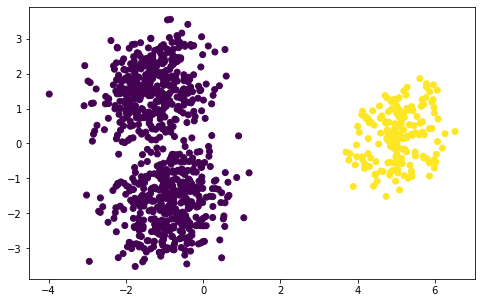

In [39]:
#Plot cluster result of agglomerative method
plt.figure(figsize=(8,5))
plt.scatter(pca_components[:,0], pca_components[:,1], c=agg)

**Observation:**
Dataset is divided into two clusters using unsupervised learning agglomerative model. I need to check the how the real data fit into these two clusters.

<AxesSubplot:>

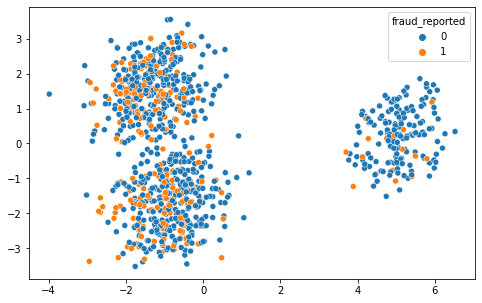

In [40]:
#real data distribution
fig, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=y)

**Observation:**
1. Most of the auto insurance fraud data have the similar feature pattern with the regular claim.
2. The labels from real dataset don't match the clustering pattern using unsupervised learning method. 
3. Within each group, the lable pattern from real dataset are different.
**Consider using supervise learning and ANN to identify the frauds for each group, and expect to have different models more suitable for different group.**

#### 4.1.3 Data grouping

In [41]:
G1_X = X.iloc[agg==0]
G1_y = y.iloc[agg==0]
G2_X = X.iloc[agg==1]
G2_y = y.iloc[agg==1]

In [42]:
scaler = StandardScaler()
G1_X_sc = scaler.fit_transform(G1_X)
G2_X_sc = scaler.fit_transform(G2_X)

In [43]:
np.shape(G1_X),np.shape(G1_y)

((822, 127), (822,))

In [118]:
np.sum(G1_y)

231

In [44]:
np.shape(G2_X),np.shape(G2_y)

((178, 127), (178,))

In [119]:
np.sum(G2_y)

16

In [45]:
np.shape(X),np.shape(y)

((1000, 127), (1000,))

## 4.2 Supervised Learning

In [46]:
#https://www.google.com/search?q=cross_val_score+can+use+shuffle%3DTrue&rlz=1C1SQJL_enUS835US863&oq=cross_val_score+can+use+shuffle%3DTrue&aqs=chrome..69i57j33i160.7931j0j7&sourceid=chrome&ie=UTF-8#kpvalbx=_0bH3YsfRMuGrqtsPxsGtoAY18
#using shuffle in cross validation
#from sklearn.model_selection import StratifiedKFold
#skf=StratifiedKFold(5,shuffle=True,random_state=42)
#lr =  LogisticRegression()

#recall = np.mean(cross_val_score(lr,X_sc,y,cv=skf,scoring='recall'))
#precision = np.mean(cross_val_score(lr,X_sc,y,cv=skf,scoring='precision'))
#accuracy = np.mean(cross_val_score(lr,X_sc,y,cv=skf,scoring='accuracy'))
#f1_score = np.mean(cross_val_score(lr,X_sc,y,cv=skf,scoring='f1_macro'))
#recall,precision,accuracy,f1_score

### 4.2.1 Logistic Regression

In [103]:
from sklearn.model_selection import cross_val_score
lr =  LogisticRegression()
G1_recall = np.mean(cross_val_score(lr,G1_X_sc,G1_y,cv=5,scoring='recall'))
G1_precision = np.mean(cross_val_score(lr,G1_X_sc,G1_y,cv=5,scoring='precision'))
G1_accuracy = np.mean(cross_val_score(lr,G1_X_sc,G1_y,cv=5,scoring='accuracy'))
G1_f1_score = np.mean(cross_val_score(lr,G1_X_sc,G1_y,cv=5,scoring='f1_macro'))

In [104]:
G1_recall,G1_precision,G1_accuracy,G1_f1_score

(0.6147086031452359, 0.6767252127717244, 0.8090317812269031, 0.756670699031102)

In [50]:
G2_recall = np.mean(cross_val_score(lr,G2_X_sc,G2_y,cv=5,scoring='recall'))
G2_precision = np.mean(cross_val_score(lr,G2_X_sc,G2_y,cv=5,scoring='precision'))
G2_accuracy = np.mean(cross_val_score(lr,G2_X_sc,G2_y,cv=5,scoring='accuracy'))
G2_f1_score = np.mean(cross_val_score(lr,G2_X_sc,G2_y,cv=5,scoring='f1_macro'))

In [51]:
G2_recall,G2_precision,G2_accuracy,G2_f1_score

(0.39999999999999997,
 0.5666666666666667,
 0.9157142857142858,
 0.6771342627960275)

### 4.2.2 Random Forest

recall with max_depth =  [2, 5, 20, 50, 80, 100, None]: [0.71898004 0.71899483 0.76280118 0.76645233 0.76157428 0.75915004
 0.75184035]


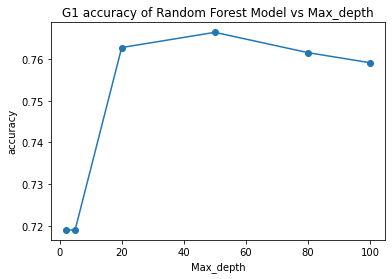

In [120]:
#group1 data-RF

accuracy = np.zeros(7)
max_depth_list = [2, 5, 20, 50, 80, 100, None]
for i in range(7):
    clf = RandomForestClassifier(n_estimators=500, max_depth=max_depth_list[i])
    accuracy[i] = np.mean(cross_val_score(clf,G1_X_sc,G1_y,cv=5,scoring='accuracy'))
    
print('recall with max_depth =  [2, 5, 20, 50, 80, 100, None]:',accuracy)
fig = plt.figure()
plt.plot(max_depth_list,accuracy,'-o')
plt.title('G1 accuracy of Random Forest Model vs Max_depth')
plt.xlabel('Max_depth')
plt.ylabel('accuracy')
plt.show()

accuracy with max_features = [2, 4, 6, 8, 11, None]: [0.71777531 0.72382853 0.74210643 0.76035477 0.7627864  0.79929786]


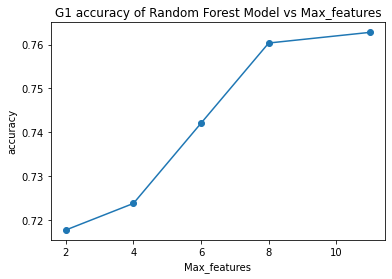

In [121]:
accuracy = np.zeros(6)
max_features_list = [2, 4, 6, 8, 11, None]
for i in range(6):
    clf = RandomForestClassifier(n_estimators=500, max_depth=50, max_features=max_features_list[i])
    accuracy[i] = np.mean(cross_val_score(clf,G1_X_sc,G1_y,cv=5,scoring='accuracy'))
    
print('accuracy with max_features = [2, 4, 6, 8, 11, None]:',accuracy)
fig = plt.figure()
plt.plot(max_features_list,accuracy,'-o')
plt.title('G1 accuracy of Random Forest Model vs Max_features')
plt.xlabel('Max_features')
plt.ylabel('accuracy')
plt.show()

In [122]:
rfc_best =  RandomForestClassifier(max_depth = 50, max_features = None, n_estimators=500)
G1_recall = np.mean(cross_val_score(rfc_best,G1_X_sc,G1_y,cv=5,scoring='recall'))
G1_precision = np.mean(cross_val_score(rfc_best,G1_X_sc,G1_y,cv=5,scoring='precision'))
G1_accuracy = np.mean(cross_val_score(rfc_best,G1_X_sc,G1_y,cv=5,scoring='accuracy'))
G1_f1_score = np.mean(cross_val_score(rfc_best,G1_X_sc,G1_y,cv=5,scoring='f1_macro'))
G1_recall,G1_precision,G1_accuracy,G1_f1_score

(0.6971322849213691,
 0.6140506087043618,
 0.7895565410199555,
 0.7571271263371508)

accuracy with max_depth =  [2, 5, 20, 50, 80, 100, None]: [0.91015873 0.91015873 0.91015873 0.91015873 0.91015873 0.91015873
 0.91015873]


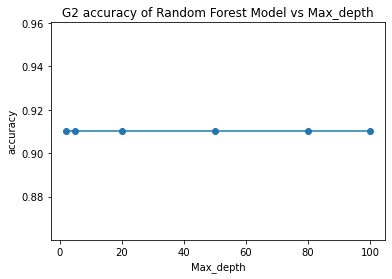

In [55]:
#group2 data-RF
accuracy = np.zeros(7)
max_depth_list = [2, 5, 20, 50, 80, 100, None]
for i in range(7):
    clf = RandomForestClassifier(n_estimators=500, max_depth=max_depth_list[i])
    accuracy[i] = np.mean(cross_val_score(clf,G2_X_sc,G2_y,cv=5,scoring='accuracy'))   
    
print('accuracy with max_depth =  [2, 5, 20, 50, 80, 100, None]:',accuracy)
fig = plt.figure()
plt.plot(max_depth_list,accuracy,'-o')
plt.title('G2 accuracy of Random Forest Model vs Max_depth')
plt.xlabel('Max_depth')
plt.ylabel('accuracy')
plt.show()    

Accuracy with max_features = [2, 4, 6, 8, 11, None]: [0.91015873 0.91015873 0.91015873 0.91015873 0.91015873 0.93238095]


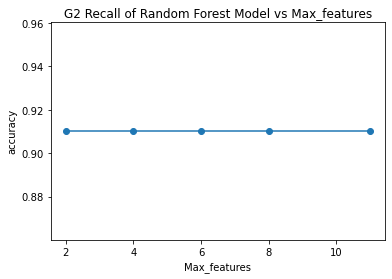

In [56]:
accuracy = np.zeros(6)
max_features_list = [2, 4, 6, 8, 11, None]
for i in range(6):
    clf = RandomForestClassifier(n_estimators=500, max_depth=30, max_features=max_features_list[i])
    accuracy[i] = np.mean(cross_val_score(clf,G2_X_sc,G2_y,cv=5,scoring='accuracy'))
    
print('Accuracy with max_features = [2, 4, 6, 8, 11, None]:',accuracy)
fig = plt.figure()
plt.plot(max_features_list,accuracy,'-o')
plt.title('G2 Recall of Random Forest Model vs Max_features')
plt.xlabel('Max_features')
plt.ylabel('accuracy')
plt.show()    

In [110]:
rfc_best =  RandomForestClassifier(max_depth = None, max_features =None, n_estimators=500)
G2_recall = np.mean(cross_val_score(rfc_best,G2_X_sc,G2_y,cv=5,scoring='recall'))
G2_precision = np.mean(cross_val_score(rfc_best,G2_X_sc,G2_y,cv=5,scoring='precision'))
G2_accuracy = np.mean(cross_val_score(rfc_best,G2_X_sc,G2_y,cv=5,scoring='accuracy'))
G2_f1_score = np.mean(cross_val_score(rfc_best,G2_X_sc,G2_y,cv=5,scoring='f1_macro'))
G2_recall,G2_precision,G2_accuracy,G2_f1_score

(0.5833333333333333, 0.79, 0.9266666666666667, 0.781466297359445)

### 4.2.3 KNN

G1 accuracy with n_neighbors_list = [2, 3, 5, 7, 15, 30, 50, 100]: [0.61193644 0.66544715 0.67518847 0.695898   0.71412417 0.72141907
 0.7238507  0.71898004]


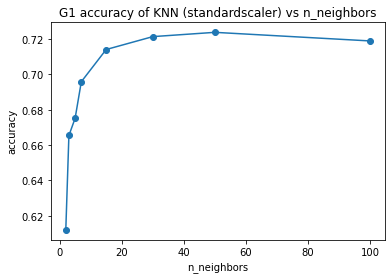

In [63]:
#group1 data-KNN

accuracy = np.zeros(8)
n_neighbors_list = [2, 3, 5, 7, 15, 30, 50, 100]
for i in range(8):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors_list[i],weights='distance') 
    accuracy[i] = np.mean(cross_val_score(clf,G1_X_sc,G1_y,cv=5,scoring='accuracy'))
    
print('G1 accuracy with n_neighbors_list = [2, 3, 5, 7, 15, 30, 50, 100]:',accuracy)
fig = plt.figure()
plt.plot(n_neighbors_list,accuracy,'-o')
plt.title('G1 accuracy of KNN (standardscaler) vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.show()

In [65]:
knn_best = KNeighborsClassifier(n_neighbors=50,weights='distance')
G1_recall = np.mean(cross_val_score(knn_best,G1_X_sc,G1_y,cv=5,scoring='recall'))
G1_precision = np.mean(cross_val_score(knn_best,G1_X_sc,G1_y,cv=5,scoring='precision'))
G1_accuracy = np.mean(cross_val_score(knn_best,G1_X_sc,G1_y,cv=5,scoring='accuracy'))
G1_f1_score = np.mean(cross_val_score(knn_best,G1_X_sc,G1_y,cv=5,scoring='f1_macro'))
G1_recall,G1_precision,G1_accuracy,G1_f1_score


(0.021739130434782608,
 0.5333333333333333,
 0.7238507021433851,
 0.4400893317340378)

G2 accuracy with n_neighbors_list = [2, 3, 5, 7, 15, 30, 50, 100]: [0.8647619  0.88190476 0.91015873 0.91015873 0.91015873 0.91015873
 0.91015873 0.91015873]


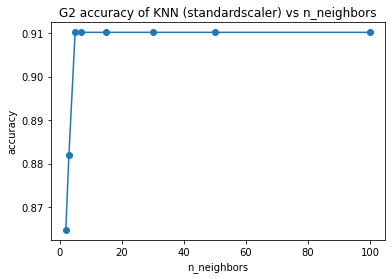

In [66]:
#group2 data-KNN

accuracy = np.zeros(8)
n_neighbors_list = [2, 3, 5, 7, 15, 30, 50, 100]
for i in range(8):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors_list[i],weights='distance') 
    accuracy[i] = np.mean(cross_val_score(clf,G2_X_sc,G2_y,cv=5,scoring='accuracy'))
    
print('G2 accuracy with n_neighbors_list = [2, 3, 5, 7, 15, 30, 50, 100]:',accuracy)
fig = plt.figure()
plt.plot(n_neighbors_list,accuracy,'-o')
plt.title('G2 accuracy of KNN (standardscaler) vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.show()

In [67]:
knn_best = KNeighborsClassifier(n_neighbors=5,weights='distance')
G2_recall = np.mean(cross_val_score(knn_best,G2_X_sc,G2_y,cv=5,scoring='recall'))
G2_precision = np.mean(cross_val_score(knn_best,G2_X_sc,G2_y,cv=5,scoring='precision'))
G2_accuracy = np.mean(cross_val_score(knn_best,G2_X_sc,G2_y,cv=5,scoring='accuracy'))
G2_f1_score = np.mean(cross_val_score(knn_best,G2_X_sc,G2_y,cv=5,scoring='f1_macro'))
G2_recall,G2_precision,G2_accuracy,G2_f1_score

(0.06666666666666667, 0.2, 0.9101587301587302, 0.5263310857940013)

### 4.2.4 Gradient Boosting

G1 accuracy with max_depth_list = [2, 3, 5, 7, 20, 50, None]: [0.77617886 0.77861789 0.77373984 0.77864006 0.77252033 0.77618625
 0.77618625]


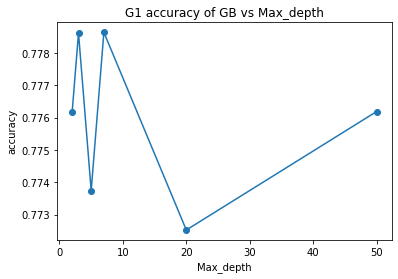

In [68]:
#group1 data-GB
accuracy = np.zeros(7)
max_depth_list = [2, 3, 5, 7, 20, 50, None]
for i in range(7):
    clf = GradientBoostingClassifier(n_estimators=500, max_depth=max_depth_list[i])
    accuracy[i] = np.mean(cross_val_score(clf,G1_X_sc,G1_y,cv=5,scoring='accuracy'))
print('G1 accuracy with max_depth_list = [2, 3, 5, 7, 20, 50, None]:',accuracy)
fig = plt.figure()
plt.plot(max_depth_list,accuracy,'-o')
plt.title('G1 accuracy of GB vs Max_depth')
plt.xlabel('Max_depth')
plt.ylabel('accuracy')
plt.show()

G1 accuracy with learning_rate = [0.001,0.005,0.01,0.1,0.5,1]: [0.74457502 0.77373984 0.78226903 0.77497413 0.77740576 0.77254989]


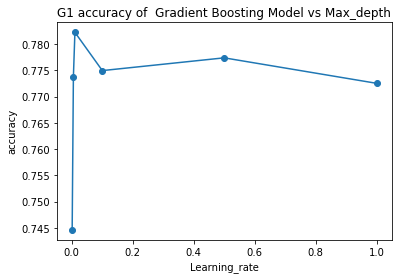

In [69]:
accuracy = np.zeros(6)
learning_rate_list = [0.001,0.005,0.01,0.1,0.5,1]
for i in range(6):
    clf = GradientBoostingClassifier(n_estimators=500, max_depth=7, learning_rate=learning_rate_list[i])
    accuracy[i] = np.mean(cross_val_score(clf,G1_X_sc,G1_y,cv=5,scoring='accuracy'))  

print('G1 accuracy with learning_rate = [0.001,0.005,0.01,0.1,0.5,1]:',accuracy)
fig = plt.figure()
plt.plot(learning_rate_list,accuracy,'-o')
plt.title('G1 accuracy of  Gradient Boosting Model vs Max_depth')
plt.xlabel('Learning_rate')
plt.ylabel('accuracy')
plt.show()   

In [70]:
gb_best =  GradientBoostingClassifier(n_estimators=500, max_depth=7, learning_rate=0.01)
G1_recall = np.mean(cross_val_score(gb_best,G1_X_sc,G1_y,cv=5,scoring='recall'))
G1_precision = np.mean(cross_val_score(gb_best,G1_X_sc,G1_y,cv=5,scoring='precision'))
G1_accuracy = np.mean(cross_val_score(gb_best,G1_X_sc,G1_y,cv=5,scoring='accuracy'))
G1_f1_score = np.mean(cross_val_score(gb_best,G1_X_sc,G1_y,cv=5,scoring='f1_macro'))
G1_recall,G1_precision,G1_accuracy,G1_f1_score


(0.5973172987974099,
 0.6236947231512449,
 0.7810495195861049,
 0.7290529764885809)

accuracy with max_depth_list = [2, 3, 5, 7, 20, 50, None]: [0.93238095 0.93238095 0.9552381  0.92111111 0.92111111 0.91555556
 0.92111111]


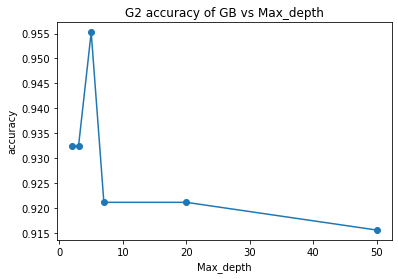

In [71]:
#group2 data-GB
accuracy = np.zeros(7)
max_depth_list = [2, 3, 5, 7, 20, 50, None]
for i in range(7):
    clf = GradientBoostingClassifier(n_estimators=500, max_depth=max_depth_list[i])
    accuracy[i] = np.mean(cross_val_score(clf,G2_X_sc,G2_y,cv=5,scoring='accuracy'))
print('accuracy with max_depth_list = [2, 3, 5, 7, 20, 50, None]:',accuracy)
fig = plt.figure()
plt.plot(max_depth_list,accuracy,'-o')
plt.title('G2 accuracy of GB vs Max_depth')
plt.xlabel('Max_depth')
plt.ylabel('accuracy')
plt.show()

accuracy with learning_rate = [0.001,0.005,0.01,0.1,0.5,1]: [0.91015873 0.93825397 0.94412698 0.94968254 0.91571429 0.90428571]


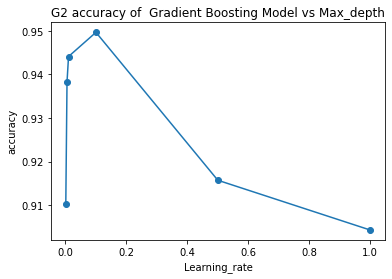

In [72]:
accuracy = np.zeros(6)
learning_rate_list = [0.001,0.005,0.01,0.1,0.5,1]
for i in range(6):
    clf = GradientBoostingClassifier(n_estimators=500, max_depth=5, learning_rate=learning_rate_list[i])
    accuracy[i] = np.mean(cross_val_score(clf,G2_X_sc,G2_y,cv=5,scoring='accuracy'))   

print('accuracy with learning_rate = [0.001,0.005,0.01,0.1,0.5,1]:',accuracy)
fig = plt.figure()
plt.plot(learning_rate_list,accuracy,'-o')
plt.title('G2 accuracy of  Gradient Boosting Model vs Max_depth')
plt.xlabel('Learning_rate')
plt.ylabel('accuracy')
plt.show()   

In [73]:
gb_best =  GradientBoostingClassifier(n_estimators=500, max_depth=5, learning_rate=0.1)
G2_recall = np.mean(cross_val_score(gb_best,G2_X_sc,G2_y,cv=5,scoring='recall'))
G2_precision = np.mean(cross_val_score(gb_best,G2_X_sc,G2_y,cv=5,scoring='precision'))
G2_accuracy = np.mean(cross_val_score(gb_best,G2_X_sc,G2_y,cv=5,scoring='accuracy'))
G2_f1_score = np.mean(cross_val_score(gb_best,G2_X_sc,G2_y,cv=5,scoring='f1_macro'))
G2_recall,G2_precision,G2_accuracy,G2_f1_score

(0.5833333333333333, 0.85, 0.9496825396825397, 0.8402576527949662)

**Observation:**
1. Treat dataset as a whole causes overfitting problem with very different accuracy between training and test dataset.
2. Grouped data showed closed results between training dataset and test dataset within group.
3. For group1 data, the best supervised learning model is random forest classification.
4. For group2 data, the best supervised learning model is logistic regression classification.

## 4.3 Deep learning: ANN

In [74]:
def plot_confusion_matrix(cm, classes,normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_sc_train = scaler.fit_transform(X_train)
X_sc_test = scaler.fit_transform(X_test)
Y_train = to_categorical(y_train, 2)
Y_test = to_categorical(y_test, 2)

In [76]:
G1_X_train, G1_X_test, G1_y_train, G1_y_test = train_test_split(G1_X, G1_y, shuffle=True, test_size=0.3, random_state=42)
G1_X_sc_train = scaler.fit_transform(G1_X_train)
G1_X_sc_test = scaler.fit_transform(G1_X_test)
G1_Y_train = to_categorical(G1_y_train, 2)
G1_Y_test = to_categorical(G1_y_test, 2)

In [77]:
G2_X_train, G2_X_test, G2_y_train, G2_y_test = train_test_split(G2_X, G2_y, shuffle=True, test_size=0.3, random_state=42)
G2_X_sc_train = scaler.fit_transform(G2_X_train)
G2_X_sc_test = scaler.fit_transform(G2_X_test)
G2_Y_train = to_categorical(G2_y_train, 2)
G2_Y_test = to_categorical(G2_y_test, 2)

### 4.3.1 All data

### 4.3.2 Group1  data

In [79]:
np.shape(G1_X_sc_train)

(575, 127)

In [1]:
#group1 data-ANN
model = Sequential()
# our first dense layer
model.add(Dense(1024, input_shape=(127,), activation="relu"))
# our second dense layer
model.add(Dense(64, activation="relu"))

# last layer is the output layer.
model.add(Dense(2, activation="softmax"))

#model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])

#print out recall
#https://datascience.stackexchange.com/questions/28874/how-to-maximize-recall
from tensorflow.keras.metrics import Recall
#model.compile(optimizer='sgd', loss='categorical_crossentropy',
#              metrics=['accuracy'])

model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=[Recall()])


# setting verbose=1 prints out some results after each epoch
model.fit(G1_X_sc_train, G1_Y_train, batch_size=128,class_weight={0: 1., 1:1.},epochs=20, verbose=1)

NameError: name 'Sequential' is not defined

In [90]:
G1_y_pred = model.predict(G1_X_sc_test, batch_size=128,verbose=1)
G1_y_pred_bool = np.argmax(G1_y_pred, axis=1)

print(classification_report(G1_y_test, G1_y_pred_bool))

2/2 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       176
           1       0.56      0.70      0.62        71

    accuracy                           0.76       247
   macro avg       0.71      0.74      0.72       247
weighted avg       0.78      0.76      0.76       247



### 4.3.3 Group2 data

In [91]:
np.shape(G2_X_sc_train)

(124, 127)

In [101]:
#group2 data-ANN
model = Sequential()
# our first dense layer
model.add(Dense(1024, input_shape=(127,), activation="relu"))
# our second dense layer
model.add(Dense(64, activation="relu"))

# last layer is the output layer.
model.add(Dense(2, activation="softmax"))

#model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])

#print out recall
#https://datascience.stackexchange.com/questions/28874/how-to-maximize-recall
from tensorflow.keras.metrics import Recall
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])


# setting verbose=1 prints out some results after each epoch
model.fit(G2_X_sc_train, G2_Y_train, batch_size=8, class_weight={0: 1., 1:1.},epochs=20, verbose=1)

Epoch 1/20
16/16 [==============================] - 0s 3ms/step - loss: 0.4557 - accuracy: 0.8629
Epoch 2/20
16/16 [==============================] - 0s 2ms/step - loss: 0.2963 - accuracy: 0.9113
Epoch 3/20
16/16 [==============================] - 0s 2ms/step - loss: 0.2453 - accuracy: 0.9113
Epoch 4/20
16/16 [==============================] - 0s 2ms/step - loss: 0.2120 - accuracy: 0.9113
Epoch 5/20
16/16 [==============================] - 0s 3ms/step - loss: 0.1827 - accuracy: 0.9113
Epoch 6/20
16/16 [==============================] - 0s 2ms/step - loss: 0.1606 - accuracy: 0.9274
Epoch 7/20
16/16 [==============================] - 0s 2ms/step - loss: 0.1399 - accuracy: 0.9435
Epoch 8/20
16/16 [==============================] - 0s 2ms/step - loss: 0.1242 - accuracy: 0.9597
Epoch 9/20
16/16 [==============================] - 0s 2ms/step - loss: 0.1095 - accuracy: 0.9597
Epoch 10/20
16/16 [==============================] - 0s 2ms/step - loss: 0.0972 - accuracy: 0.9597
Epoch 11/20
16/16 [

In [102]:
G2_y_pred = model.predict(G2_X_sc_test, batch_size=8,verbose=1)
G2_y_pred_bool = np.argmax(G2_y_pred, axis=1)

print(classification_report(G2_y_test, G2_y_pred_bool))

7/7 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        49
           1       0.00      0.00      0.00         5

    accuracy                           0.91        54
   macro avg       0.45      0.50      0.48        54
weighted avg       0.82      0.91      0.86        54



**Use above ANN model**


### Observation:
**1. When using ReLU as activation function, the best performance in training sets is achieved using 8 as the mini batch size. However, the difference between the accuracy of the training and test sets are relatively large compared to the accuracy achieved when using train dataset size as mini batch size. I will go with train dataset size because of the overfitting concerns.**<br>

**2. Activation function ReLU  is better than Sigmoid and tanh for this problem with regards of accuracy and overfitting concernss.**

**Observation:**
1. ANN model works better for whole dataset than supervised learning in terms of overfitting problem.
2. ANN model works better for group1 dataset than group2 dataset based on accuracy.

## 5. Final results
Total  22.7% records are recognized as fraudulent claims after combining unsupervised clustering, supervised classification and deep learning.